In [12]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
   -------------------------------------- 258.3/258.3 kB 691.0 kB/s eta 0:00:00
   -------------------------------------- 301.8/301.8 kB 889.0 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated package


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

TREATED_DATASET = '../dataset/fake_job_word2vec.csv'

In [33]:
import pickle

# Carregar o DataFrame com pickle
with open('../dataset/fake_job_word2vec.pkl', 'rb') as f:
    data = pickle.load(f)

In [34]:
data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,required_education_Vocational - HS Diploma,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector
0,0,1,0,0,0,0,0,0,0,1,...,0,0.247668,0.115215,0.244362,-0.009132,0.035534,0.031247,0.000000,0.000000,0.244362
1,0,1,0,0,0,0,0,0,1,0,...,0,-0.060168,0.102202,0.254773,-0.012521,0.004112,0.006893,0.013835,0.113106,-0.101499
2,0,1,0,0,0,0,1,0,0,0,...,0,0.069010,0.002190,0.000000,-0.023828,0.008513,-0.020861,0.000000,0.000000,0.000000
3,0,1,0,0,0,0,0,0,1,0,...,0,0.048156,0.061260,0.092472,0.000941,0.023731,0.036613,0.038574,-0.072177,0.092472
4,0,1,1,0,0,0,0,0,1,0,...,0,0.002881,0.038611,0.000000,-0.024219,-0.018626,0.028890,0.016103,-0.115658,-0.178535


In [10]:
colums_to_drop = ['fraudulent']

X = data.drop(columns=colums_to_drop)
Y = data['fraudulent']

In [14]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, Y)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.25)

### Random Forest

In [16]:
rf = RandomForestClassifier().fit(X_train, Y_train)

has_company_logo                        0.179499
company_profile_vector                  0.086798
has_questions                           0.086426
required_education_Bachelor's Degree    0.055481
function_vector                         0.053094
required_experience_Mid-Senior level    0.051199
department_vector                       0.043267
industry_vector                         0.042411
benefits_vector                         0.035238
location_vector                         0.031729
dtype: float64


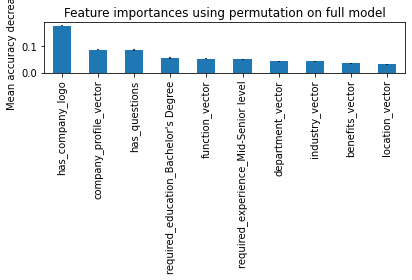

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=100, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

forest_importances_sorted = forest_importances.sort_values(ascending=False)

# Selecionar as 10 features mais importantes
top_10_features = forest_importances_sorted.head(10)
print(top_10_features)
top_10_indices = [X_test.columns.get_loc(col) for col in top_10_features.index]
top_10_std = result.importances_std[top_10_indices]

# Plotar as 10 features mais importantes
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=top_10_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Confusion Matrix

Acurácia dos dados de teste:  0.9854237686611026



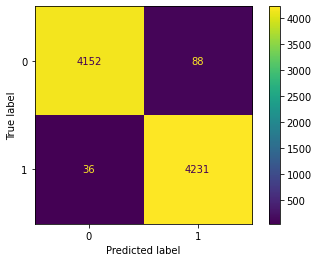

In [23]:
y_pred = rf.predict(X_test)

print("Acurácia dos dados de teste: ", accuracy_score(Y_test,y_pred))
print()

cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()

plt.show()

## Evaluation Metrics

Precision

In [24]:
precision_score_number = precision_score(Y_test, y_pred)

Recall

In [25]:
recall_score_number = recall_score(Y_test, y_pred)

F1-Score

In [26]:
f1_score_number = f1_score(Y_test, y_pred)

Func for printing all the evaluate metrics

In [27]:
def get_evaluate_metrics():
    print(f'''
        Precision Score of the fake class is: {precision_score_number}
        Recall Score of the fake class is: {recall_score_number}
        F1 Score of the fake class is: {f1_score_number}
    ''')

In [28]:
get_evaluate_metrics()


        Precision Score of the fake class is: 0.979624913174346
        Recall Score of the fake class is: 0.9915631591281932
        F1 Score of the fake class is: 0.9855578849289541
    


Precision-Recall Curve -> We are dealing with a imbalanced dataset, so the choice for using the Precision-Recall Curve is because it gives more importance to positive class. Thus is helpful for dealing with imbalanced data, which is our case for fake job postings. 

In [29]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred)
average_precision = average_precision_score(Y_test, y_pred)

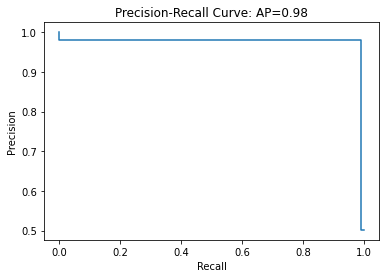

In [30]:
plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.show()

c:\Users\JoaoFelipeMoraisVasc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


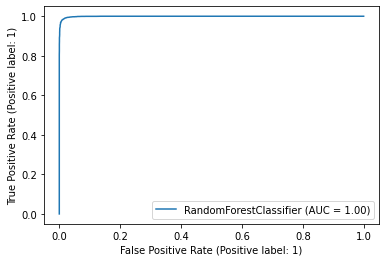

In [31]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plot_roc_curve(rf, X_test, Y_test)

### Final Report of our Model

In [32]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4240
           1       0.98      0.99      0.99      4267

    accuracy                           0.99      8507
   macro avg       0.99      0.99      0.99      8507
weighted avg       0.99      0.99      0.99      8507

